# Exercise 6.3

In [1]:
import pathlib
import importlib.util
import numpy as np
import pandas as pd
from IPython.display import display, Math
from scipy import stats

In [2]:
# From what's on page 275 and 276, we can see that the f-value for the difference vector is the same as that
# for the confidence ellipse from 5.4 on pages 220 and 221.
# Loading the utility file from chapter 5:
fp = pathlib.WindowsPath(r'..\chapter-5\chapter_5_utils.py')
spec = importlib.util.spec_from_file_location('plot_confidence_ellipse',fp)
my_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(my_module)

Municipal
wastewater treatment plants are required by law to monitor their discharges into
rivers and streams on a regular basis. Concern about the reliability of data from one
of these self-monitoring programs led to a study in which samples of effluent were
divided and sent to two laboratories for testing. One-half of each sample was sent to
the Wisconsin State Laboratory of Hygiene, and one-half was sent to a private commercial
laboratory routinely used in the monitoring program.

- `BOD`: biochemical oxygen demand
- `SS`: suspended solids

In [3]:
def load_data() -> pd.DataFrame:
    fpth = pathlib.WindowsPath(r'..\..\data\Table6.1.xlsx')
    return pd.read_excel(fpth)

In [4]:
effluent_df = load_data()
effluent_df.head(3)

,Sample j,Commercial lab BOD,Commercial lab SS,State lab of hygiene BOD,State lab of hygiene SS
0,1,6,27,25,15
1,2,6,23,28,13
2,3,18,64,36,22


In [5]:
effluent_df['d1'] = effluent_df['Commercial lab BOD'] - effluent_df['State lab of hygiene BOD']
effluent_df['d2'] = effluent_df['Commercial lab SS'] - effluent_df['State lab of hygiene SS']
effluent_df.head(3)

,Sample j,Commercial lab BOD,Commercial lab SS,State lab of hygiene BOD,State lab of hygiene SS,d1,d2
0,1,6,27,25,15,-19,12
1,2,6,23,28,13,-22,10
2,3,18,64,36,22,-18,42


In [6]:
# Remove outlier observation.
effluent_df.drop(7, inplace=True)

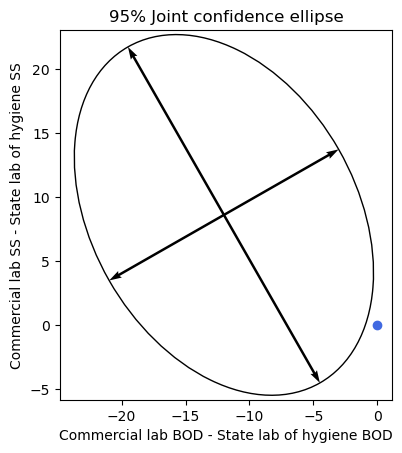

In [7]:
my_plot, ax = my_module.plot_confidence_ellipse(effluent_df[['d1','d2']],n=effluent_df.shape[0],p=2,alpha=0.05)
my_plot.title('95% Joint confidence ellipse')
my_plot.xlabel('Commercial lab BOD - State lab of hygiene BOD')
my_plot.ylabel('Commercial lab SS - State lab of hygiene SS')
my_plot.plot(0,0, marker='o', color='royalblue')
ax.set_aspect('equal')
my_plot.savefig('Question-6-3.png')
my_plot.show()

In [8]:
n = effluent_df.shape[0]
p = 2
alpha = 0.05

From (6-10a) on page 276, the Bonferroni $100(1-\alpha)$% simultaneous confidence intervals are
$$
    \delta_{i}:
    \hspace{0.4cm}
    \bar{d}_{i} \pm t_{n-1} \left(\frac{\alpha}{2p} \right)
    \sqrt{\frac{s_{d_{i}}^{2}}{n}}
$$

For $\delta_{1} = \text{Commercial lab BOD} - \text{State lab of hygiene BOD}$

In [9]:
stats.t.ppf(1-alpha/(2*p),df=n-1)

2.685010846004532

In [10]:
d1_bon_95ci = effluent_df.d1.mean()  + np.array([-1,1]) * stats.t.ppf(1-alpha/(2*p),df=n-1) * np.sqrt(effluent_df.d1.var() / effluent_df.d1.size)

In [11]:
display(Math(r'\delta_{1}:'
             r'\bar{d}_{1}'
             r'\pm '
             r't_{n - 1}(\alpha)'
             r'\sqrt{ \frac{ s_{d_{1}}^{2} }{n} }'
             '='
             fr'{effluent_df.d1.mean():.2f}'
             r'\pm'
             fr'{stats.t.ppf(1-alpha/(2*p),df=n-1):.2f}'
             fr'\sqrt{{\frac{{ {effluent_df.d1.var():.2f} }}{{ {effluent_df.d1.size} }}}}'
             r'\hspace{0.4cm}\text{or}\hspace{0.4cm}'
             f'({d1_bon_95ci[0]:.2f}, {d1_bon_95ci[1]:.2f})'
             ))

<IPython.core.display.Math object>

For $\delta_{2} = \text{Commercial lab SS} - \text{State lab of hygiene SS}$

In [12]:
d2_bon_95ci = effluent_df.d2.mean()  + np.array([-1,1]) * stats.t.ppf(1-alpha/(2*p),df=n-1) * np.sqrt(effluent_df.d2.var() / effluent_df.d2.size)

In [13]:
display(Math(r'\delta_{2}:'
             r'\bar{d}_{2}'
             r'\pm'
             r'\sqrt{ t_{n - 1}(\alpha) }'
             r'\sqrt{ \frac{ s_{d_{2}}^{2} }{n} }'
             '='
             f'{effluent_df.d2.mean():.2f}'
             r'\pm'
             f'{stats.t.ppf(1-alpha/(2*p),df=n-1):.2f}'
             fr'\sqrt{{\frac{{ {effluent_df.d2.var():.2f} }}{{ {effluent_df.d2.size} }}}}'
             r'\hspace{0.4cm}\text{or}\hspace{0.4cm}'
             f'({d2_bon_95ci[0]:.2f}, {d2_bon_95ci[1]:.2f})'
             ))

<IPython.core.display.Math object>